### Overview
Customer churn, or customer attrition, refers to when a customer ceases their relationship with a company or service provider. In today's highly competitive business environment, retaining customers is a critical factor for long-term success. Predicting customer churn can help organizations take proactive steps to retain customers, thus minimizing revenue loss. This project aims to build a machine learning model that can predict whether a customer will churn based on their demographic, account, and service-related data.


### Problem Statement
The goal of this project is to develop a classification model that predicts whether a customer will churn. Using demographic data (such as gender, senior citizen status, and tenure), along with information about the services they use (such as internet service, phone service, and online security), we will attempt to build a model that helps the company identify customers who are at a high risk of churning.
By predicting customer churn, the company can proactively design retention strategies to keep these customers, thereby improving customer satisfaction and reducing financial loss.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
file_path = "C:/Users/ROHITH/Downloads/Data_file - data_file (1).csv"
df = pd.read_csv(file_path)

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Drop the Total charges column

df = df.drop('TotalCharges', axis = 1)

In [5]:
df.SeniorCitizen = df.SeniorCitizen.apply(lambda x: 'No' if x == 0 else 'Yes')

In [6]:
# Drop the CustomerID column

df = df.drop('customerID', axis = 1)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


### Exploratory Data Analysis

In [8]:
cvars = [column for column in df.columns if df[column].dtypes != 'object']

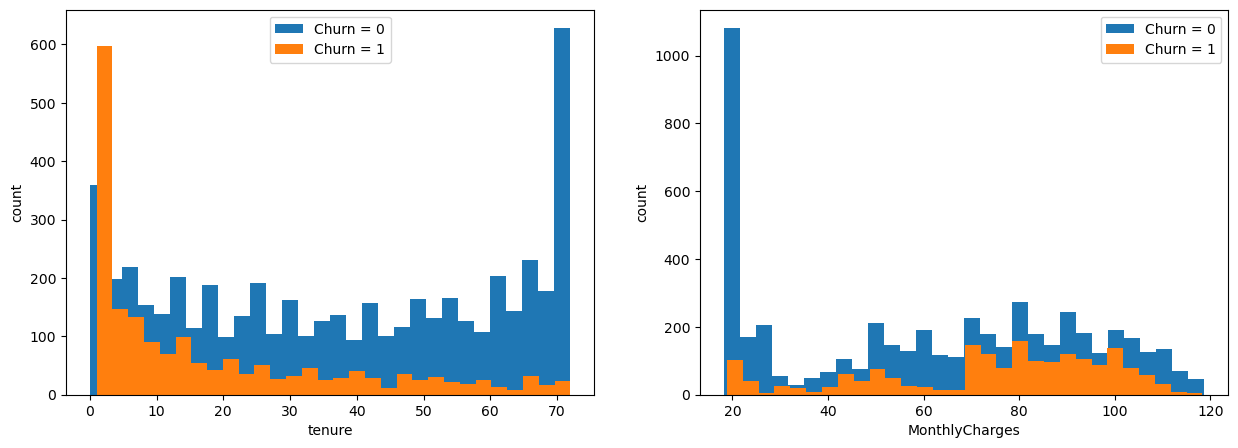

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for i, x in enumerate(cvars):
    ax[i].hist(df[x][df.Churn=='No'], label='Churn = 0', bins=30)
    ax[i].hist(df[x][df.Churn=='Yes'], label='Churn = 1', bins=30)
    ax[i].set(xlabel=x, ylabel='count')
    ax[i].legend() 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


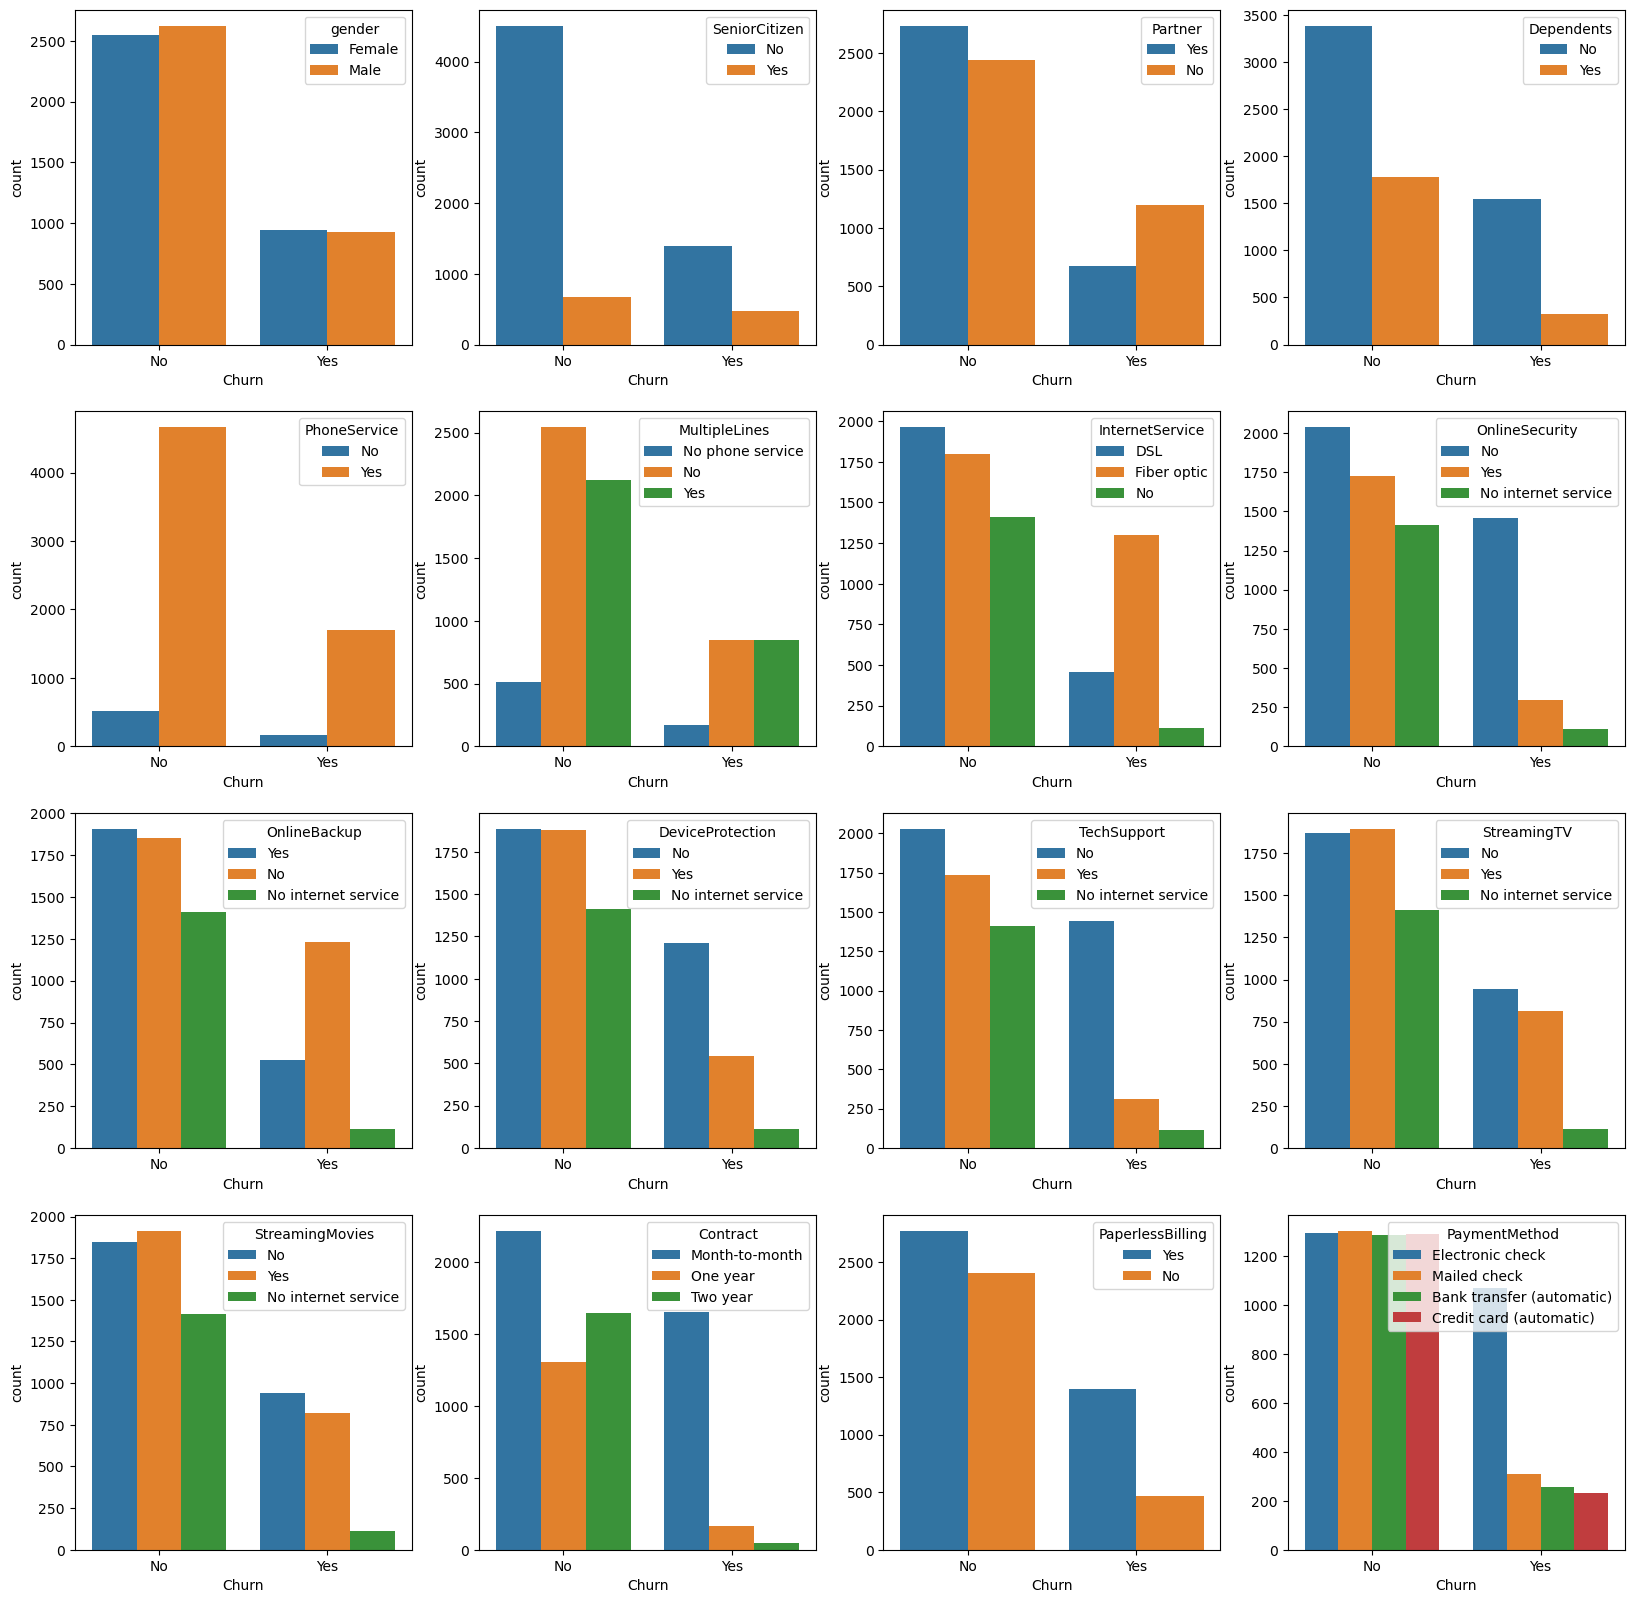

In [11]:
# Cat Var and the impact on churn

cat_var = [column for column in df.columns if df[column].dtypes == 'object']

cat_var_noChurn = cat_var[:-1]

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for axi, var in zip(ax.flat, cat_var_noChurn):
    sns.countplot(x=df.Churn, hue=df[var], ax=axi)

### Data Preprocessing

In [12]:
le = LabelEncoder()

for x in [column for column in df.columns if len(df[column].unique())==2]:
    print(x, df[x].unique())
    df[x] = le.fit_transform(df[x])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1


In [14]:
df = pd.get_dummies(df, columns = [column for column in df.columns if df[column].dtypes=='object'], drop_first=True)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,0,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,1,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,1,False,...,False,False,False,False,False,False,False,False,True,False


In [16]:
# Splitting the dataset

X = df.drop('Churn', axis = 1)
y = df['Churn']

### Model Building

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Logistic Regression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
lr_pred = log_reg.predict(X_test)

In [19]:
print("\nLogistic Regression Model:")
print(f"{round(accuracy_score(y_test, lr_pred)*100, 2)} %")
print(classification_report(y_test, lr_pred))


Logistic Regression Model:
79.95 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.65      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



Text(50.722222222222214, 0.5, 'Predicted')

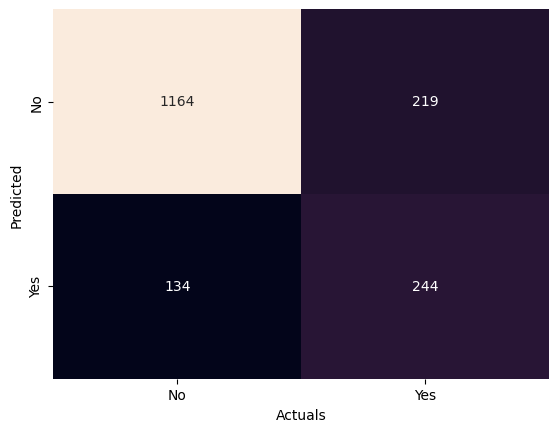

In [20]:
conf_mat = confusion_matrix(y_test, lr_pred)
sns.heatmap(conf_mat.T, annot = True, fmt='d', cbar=False,
           xticklabels=['No', 'Yes'],
           yticklabels=['No', 'Yes'])
plt.xlabel('Actuals')
plt.ylabel('Predicted')

#### Decision Tree

In [21]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
dtc_pred = dtc.predict(X_test)

In [23]:
print("\nDecision Tree Model:")
print(f"{round(accuracy_score(y_test, dtc_pred)*100, 2)} %")
print(classification_report(y_test, dtc_pred))


Decision Tree Model:
73.48 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1298
           1       0.50      0.49      0.50       463

    accuracy                           0.73      1761
   macro avg       0.66      0.66      0.66      1761
weighted avg       0.73      0.73      0.73      1761



Text(50.722222222222214, 0.5, 'Predicted')

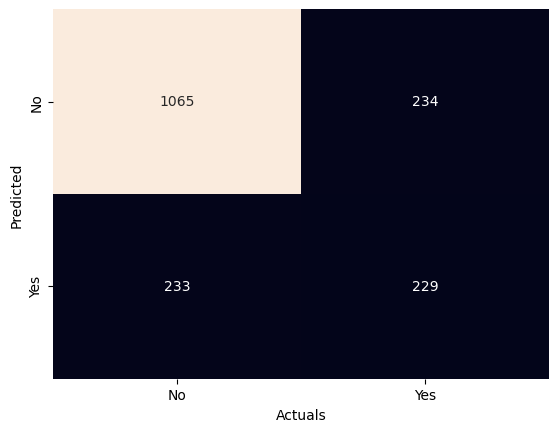

In [24]:
conf_mat = confusion_matrix(y_test, dtc_pred)
sns.heatmap(conf_mat.T, annot = True, fmt='d', cbar=False,
           xticklabels=['No', 'Yes'],
           yticklabels=['No', 'Yes'])
plt.xlabel('Actuals')
plt.ylabel('Predicted')

### KNN

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [33]:
print("\nK-Nearest Neighbors Model:")
print(f"{round(accuracy_score(y_test, knn_pred)*100, 2)} %")
print(classification_report(y_test, knn_pred))


K-Nearest Neighbors Model:
77.46 %
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1298
           1       0.58      0.53      0.55       463

    accuracy                           0.77      1761
   macro avg       0.71      0.69      0.70      1761
weighted avg       0.77      0.77      0.77      1761



Text(50.722222222222214, 0.5, 'Predicted')

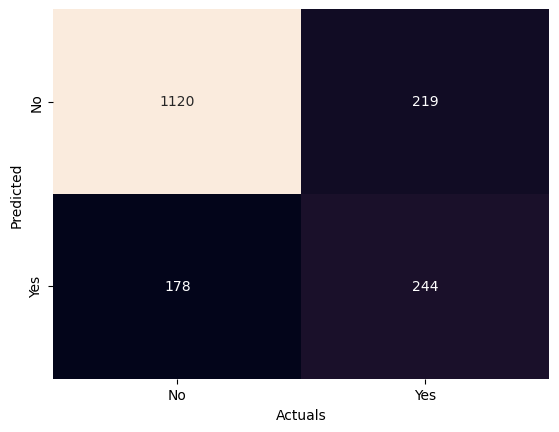

In [34]:
conf_mat = confusion_matrix(y_test, knn_pred)
sns.heatmap(conf_mat.T, annot = True, fmt='d', cbar=False,
           xticklabels=['No', 'Yes'],
           yticklabels=['No', 'Yes'])
plt.xlabel('Actuals')
plt.ylabel('Predicted')

#### Support Vector Machines

In [35]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [37]:
print("\nSupport Vector Machine Model:")
print(f"{round(accuracy_score(y_test, svm_pred)*100, 2)} %")
print(classification_report(y_test, svm_pred))


Support Vector Machine Model:
80.07 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1298
           1       0.65      0.53      0.58       463

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.73      1761
weighted avg       0.79      0.80      0.79      1761

